# Module 5.2 - Plotting on a map

Welcome to module 5.2! This module is a follow-up of module 5.1, where we were introduced to working with satellite data. In this module, we will learn:
- Ways of plotting satellite data on a map 
- How to work with geopandas, a package created for working with geographical data

## 1. Plotting data on a map

There are many ways to plot you geographical data. Here, we will look at four options:
1. Contour plot
2. Filled contour plot
3. Plotting an image of a map
4. Plotting points on a map (e.g., cities)

### 1.1. Contour plot
First, let's look at how we can make a contour plot. This can be done by using the function `ax.contour()`.
- The function `ax.contour()` takes at least three inputs: `longitudes`, `latitutes` and the actual data
- One useful argument is the argument `cmap=`, which lets you choose the colors of the contours


- We can also add labels to the contours, this can be done in two steps:
    - Assign the `ax.contour()` function to a new variable
    - Use this new variable as input to the function `ax.clabel()`. 

In the cell below we import the important packages and load temperature data for Ethiopia. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

ds = xr.open_dataset('temperatures.nc')

latmin = 3
latmax = 16
lonmin = 32
lonmax = 48

temps_ethiopia = ds.air[:, (ds.lat > latmin) & (ds.lat < latmax), (ds.lon > lonmin) & (ds.lon < lonmax)]
temps_eth_mean = np.mean(temps_ethiopia, axis=0)

Now we can use this data of Ethiopia to make a contour plot without labels:

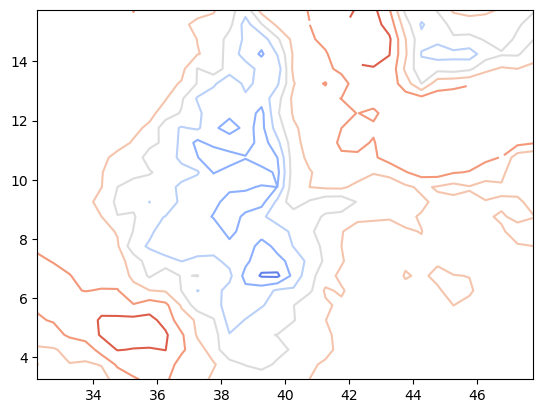

In [2]:
# Creating a fig and ax
fig, ax = plt.subplots()

# Creating the contour plot
ax.contour(temps_eth_mean.lon, temps_eth_mean.lat, temps_eth_mean, cmap='coolwarm')

And also a contour plot with labels:

<a list of 22 text.Text objects>

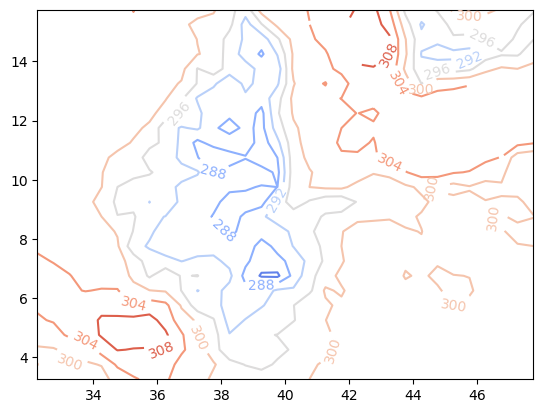

In [3]:
fig, ax = plt.subplots()

# Creating a contour plot
contour = ax.contour(temps_eth_mean.lon, temps_eth_mean.lat, temps_eth_mean, cmap='coolwarm')

# Adding the labels to the contours
ax.clabel(contour)

### 1.2. Filled contour plot

We can also create a plot with filled contours. This is done in exactly the same way as above, only now using the function `ax.contourf()` instead of `ax.contour()`. 

Here we see the same plot, but now with a filled contour. (We also add a colorbar.)

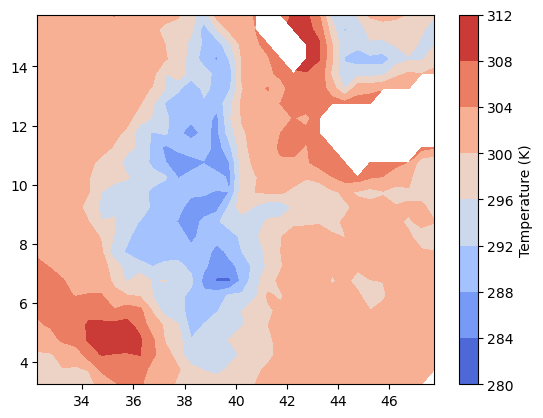

In [4]:
# ax.contourf
fig, ax = plt.subplots()

contourf = ax.contourf(temps_eth_mean.lon, temps_eth_mean.lat, temps_eth_mean, cmap='coolwarm')
fig.colorbar(contourf, label='Temperature (K)')

**Exercise:** Creating a contour plot of the South-America temperatures
- Select the temperatures of South-America (-60, 20, 260, 345) and calculate the mean over the time dimension
- Create a filled contour plot of this region

In [27]:
# Your code here

### 1.3. Plotting an image of a map

When we hava an image of a map, we can plot it.

We have an image of the map of Ethiopia, called `Ethiopia.png`. There are two steps in plotting an image:
1. We need to read the image; loading the image file into a variable
    - This is done using the function `plt.imread('your_image.png')`
2. We need to show the image; plotting the image on an axes
    - This is done using the function `ax.imshow(image_variable, extent=(lonmin, lonmax, latmin, latmax))`
   
The function `ax.imshow()` needs input for the argument `extent=`. Therefore, we create the variable `boundaries`, which contains the `lonmin`, `lonmax`, `latmin`, and `latmax` of the image that we are plotting. These values will be set as the x limits and y limits of the plot.

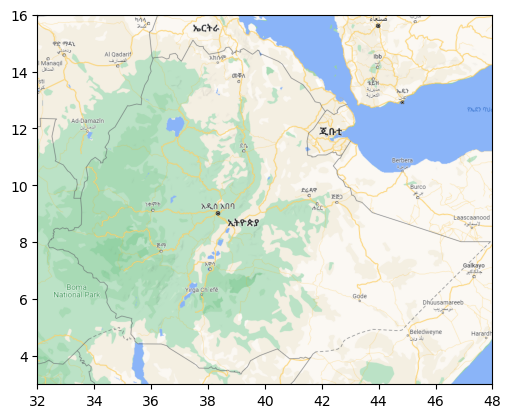

In [7]:
# Loading an image of a map to a variable
map_eth = plt.imread('Ethiopia.png')

fig, ax = plt.subplots()

# Plotting the image
boundaries = (32, 48, 3, 16)
ax.imshow(map_eth, extent=boundaries)

Now that we have plotted a map. We can add our data to the map. For example, we can add a contourplot to the map, like this:

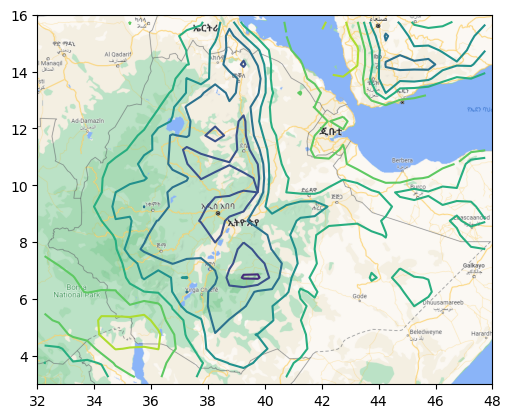

In [8]:
map_eth = plt.imread('Ethiopia.png')

fig, ax = plt.subplots()

boundaries = (32, 48, 3, 16)
ax.imshow(map_eth, extent=boundaries)

ax.contour(temps_eth_mean.lon, temps_eth_mean.lat, temps_eth_mean)

### 1.4. Plotting points on a map (e.g., cities)

Another thing we can plot on a map are points. This is useful for when we want to show some cities or measurement locations on a map. 
- We use the function `ax.scatter()` (which we saw in module 4.2)
- We will need a file with some points (values and coordinates)
    - In the example below we use a file containing cities, with for every city the name, population, longitude, and latitude

Now we will load the file with locations and plot them on the map of Ethiopia.

In [9]:
cities = pd.read_csv('census2007.csv')
cities

,City,Populationclass,lon,lat
0,Addis Ababa,70,38.761252,9.010793
1,Dire Dawa,40,42.000000,9.500000
2,Mekelle,40,39.366670,11.766670
3,Adama,40,39.270546,8.541026
4,Awassa,40,38.480716,7.057834
...,...,...,...,...
58,Kobo,20,39.628837,12.150630
59,Jinka,20,36.565182,5.785993
60,Dangila,20,39.816660,11.383330
61,Dimtu,20,37.866670,8.583330


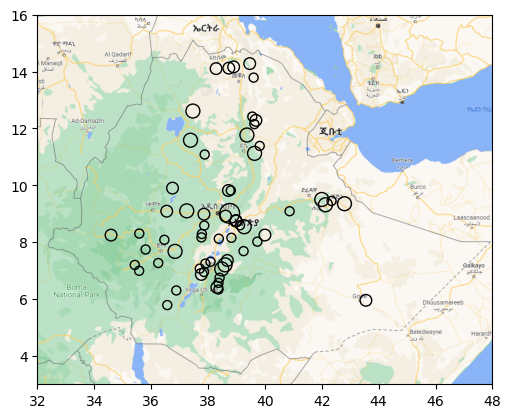

In [10]:
# Cities on a map
map_eth = plt.imread('Ethiopia.png')

fig, ax = plt.subplots()

boundaries = (32, 48, 3, 16)
ax.imshow(map_eth, extent=boundaries)

cities = pd.read_csv('census2007.csv')

ax.scatter(cities.lon, cities.lat, s=cities.Populationclass**1.25, fc='none', ec='k')

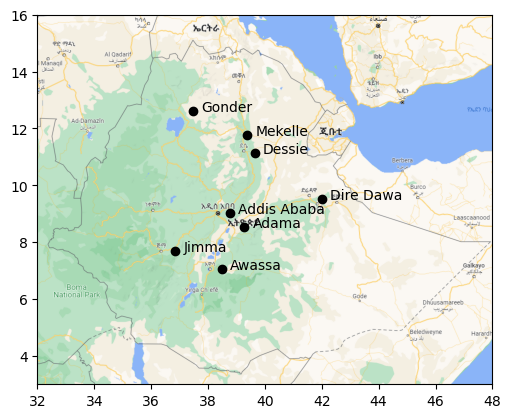

In [11]:
map_eth = plt.imread('Ethiopia.png')

fig, ax = plt.subplots()

boundaries = (32, 48, 3, 16)
ax.imshow(map_eth, extent=boundaries)

loc = cities.loc[[0, 1, 2, 3, 4, 6, 7, 8]]

for i in loc.index:
    ax.scatter(loc.lon[i], loc.lat[i], c='k')
    ax.text(loc.lon[i]+0.3, loc.lat[i], cities.City[i])

## 2. Geopandas basics

Geopandas is a Python package that makes working with geospatial data easier. In this second part of module 5.2 we will look at some of the things you can do with it:
1. Loading shapefiles
2. Plotting shapefiles
3. Changing the coordinate reference systems (CRS)
4. Creating geographical points
5. Clip data based on shape

At the end, we will apply some of these insights to NetCDF data. To create geographical points based on latitude and longitude values, and to clip a dataset based on shapefiles. 

But before we continue, let's import all necessary packages:

In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

import geopandas as gpd

### 2.1 Loading shapefiles

As said above, geopandas is able to load and work with shapefiles. Loading geographical files, like shapefiles (`.shp`) can be done using the function `gpd.read_file()`. 

In the cell below we read a `.zip` file with the shape files of the Ethiopian regions.

In [13]:
regions = gpd.read_file('regions.zip')

By loading the file, we have created a GeoDataFrame. This is similar to a normal DataFrame (which we saw in Module 3). However, GeoDataFrames are designed to store geographical data (points, lines, polygons) effectively. This location data is automatically stored in the column `geometry`. Other columns are the metadata as available in the shape file.

Run the cell below to see the content of the GeoDataFrame.

In [14]:
regions

,REGIONNAME,REG_P_CODE,REG_Pcode,HRname,HRpcode,HRparent,geometry
0,Addis Ababa,14,ET14,Addis Ababa,ET14,ET,"POLYGON ((475625.413 1005122.113, 477066.678 1..."
1,Afar,2,ET02,Afar,ET02,ET,"POLYGON ((626409.283 1602131.456, 631762.123 1..."
2,Amhara,3,ET03,Amhara,ET03,ET,"POLYGON ((232286.017 1502974.739, 232875.500 1..."
3,Beneshangul Gumu,6,ET06,Beneshangul Gumu,ET06,ET,"MULTIPOLYGON (((197368.953 992969.892, 194511...."
4,Dire Dawa,15,ET15,Dire Dawa,ET15,ET,"POLYGON ((858131.351 1069093.715, 857695.805 1..."
5,Gambela,12,ET12,Gambela,ET12,ET,"POLYGON ((-16234.943 962812.024, -12699.545 95..."
6,Hareri,13,ET13,Hareri,ET13,ET,"POLYGON ((855713.308 1038956.928, 857355.169 1..."
7,Oromia,4,ET04,Oromia,ET04,ET,"POLYGON ((472953.683 1147284.296, 473862.338 1..."
8,SNNPR,7,ET07,SNNPR,ET07,ET,"POLYGON ((453302.657 933422.196, 454224.545 93..."
9,Somali,5,ET05,Somali,ET05,ET,"POLYGON ((930045.516 1214070.207, 926150.119 1..."


### 2.2 Plotting shapefiles

- Geopandas contains the built-in function `.plot()`, which automatically plots whatever is in the column `geometry`.
- For convenience, we first create our own `fig` and `ax` and then use the argument `ax=` to plot on our own axes.
- The arguments `facecolor=` and `edgecolor=` can be used to change the colors of the inside and contour of the shapes.

Run the cell below and try out some different colors. 

<AxesSubplot: >

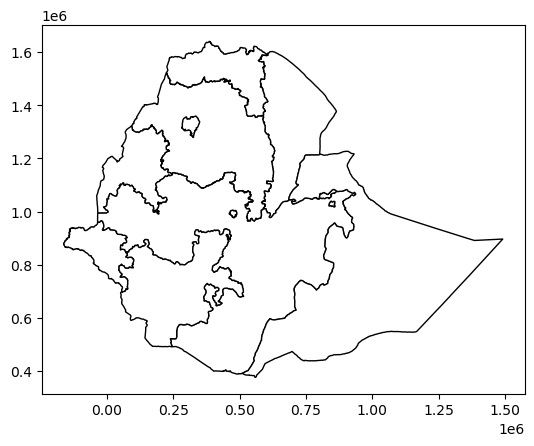

In [15]:
fig, ax = plt.subplots()

regions.plot(ax=ax, facecolor='white', edgecolor='k')

Because a GeoDataFrame is similar to a DataFrame, we can also use the same tools. For example, we can use boolean slicing to get only the region SNNPR.

**Exercise:** Run the cell below and try to select different regions. 

<AxesSubplot: >

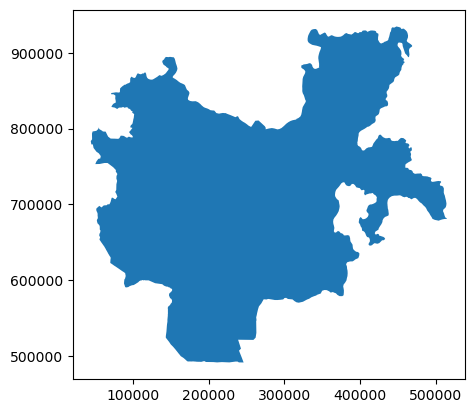

In [26]:
fig, ax = plt.subplots()

regions[regions.REGIONNAME == 'SNNPR'].plot(ax=ax)

### 2.3 Changing the coordinate reference systems (CRS)


- Different geographical data can be in a different **Coordinate Reference System** (CRS). 
- Therefore, when we want to combine data from two different sources, they first need to be set in the same CRS.
- We can **get** the CRS of a file by using the attribute `.crs` on the variable containing the GeoDataFrame. 
- We can **change** the CRS of a file by using the function `.to_crs()` and assigning the output to a new variable.

Carefully read and run the code in the cells below. Try to understand what is happening.

In [21]:
# Loading a shape file with all places of Ethiopia
places = gpd.read_file('places.zip')

In [22]:
# Show the CRS of regions
regions.crs

<Derived Projected CRS: EPSG:20137>
Name: Adindan / UTM zone 37N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Eritrea. Ethiopia - between 36°E and 42°E. Sudan - east of 36°E.
- bounds: (36.0, 3.4, 42.0, 22.01)
Coordinate Operation:
- name: UTM zone 37N
- method: Transverse Mercator
Datum: Adindan
- Ellipsoid: Clarke 1880 (RGS)
- Prime Meridian: Greenwich

In [23]:
# Show the CRS of places
places.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# Because the files have a different CRS, we change the CRS of the places file
# As input to the function we can use the CRS of the regions file
places = places.to_crs(regions.crs)

Because the CRS of `regions` and `places` is now the same, we can plot them together in one figure.

In [ ]:
fig, ax = plt.subplots()

# Plot the regions of Ethiopia
regions.plot(ax=ax, edgecolor='k', facecolor='none')

# Plot all places in Ethiopia
places.plot(ax=ax, markersize=0.5, color='r')

We can also plot only a selection of the places. For example `places.iloc[0:100].plot(ax=ax)` will plot only the first 100 places. In the same way, you can also select a specific place to plot, like Addis Abbeba (wich has index 0). 

In [ ]:
fig, ax = plt.subplots()
regions.plot(ax=ax, edgecolor='k', facecolor='none')

# The first 100 places
places.iloc[0:100].plot(ax=ax, markersize=20, color='b')

# Addis Abbeba
places.iloc[0:1].plot(ax=ax, markersize=100, color='y')

**Exercise:** Now try to plot the following places and be creative with colors and sizes:
- Addis Abeba (index: 0)
- Gonder (index: 8)
- Adama (index: 13)
- Mek'elē (index: 42)
- Dirē Dawa (index: 48)

In [ ]:
# Your code here

### 2.4 Creating geographical points

- When you have a list of x- and y-coordinates (for example, longitudes and latitudes), you can turn these into GeoPandas geographical points with the function `.points_from_xy()`. 
- If the x- and y-coordinates are in lon and lat degrees, then the CRS is `EPSG:4326`. We can set this using the argument `crs=`. 
- These newly created geometry points can be combined with other information to create a GeoDataFrame.

For example, let's say we have the latitudes and longitudes of the three highest mountain ranges from Ethiopia and we want to create a GeoDataFrame out of this. We can do this in three steps:
1. Create geographical points using latitudes and longitudes
2. Put all the other information inside a dictionary
3. Create a GeoDataFrame using the function `gpd.GeoDataFrame(dictionary_with_information, geometry=your_geometry_points)`

In [ ]:
# Creating the geographical points
lats = [13.24, 6.83, 10.95]
lons = [38.37, 39.82, 39.10]
mountain_geometry = gpd.points_from_xy(lons, lats, crs='EPSG:4326')

In [ ]:
# Creating a dictionary with other information
mountain_dict = {'mountain':['Ras Dashen', 'Tullu Demtu', 'Amba Frit'], 
                 'range':['Semien Mountains', 'Bale Mountains', 'Kollo Massif']}

In [ ]:
# Creating a GeoDataFrame
mountain_gdf = gpd.GeoDataFrame(mountain_dict, geometry=mountain_geometry)
mountain_gdf

We now have a GeoDataFrame with three geometry locations (which we created using longitude and latitude). 

These geometry locations we can plot together with the regions, if we align the crs first.

In [ ]:
# Checking the CRS of regions and mountain_gdf
print(regions.crs)
print(mountain_gdf.crs)

In [ ]:
# Changing the CRS of mountain_gdf
mountain_gdf = mountain_gdf.to_crs(regions.crs)

# Plotting the regions and mountains
fig, ax = plt.subplots()
regions.plot(ax=ax, facecolor='none', edgecolor='k')
mountain_gdf.plot(ax=ax, markersize=200, marker='^')

### 2.5 Clip data based on shape

- We can also use shapes as a mask. For example, if we want to select only the data for Ethiopia, we can use the shape of Ethiopia. 
- In module 5.1 we selected the data for Ethiopia by using `latmin`, `latmax`, `lonmin`, and `lonmax`. However, this is not accurate, because also data from neighboring countries will be selected. 
- Therefore, using a shape to select data is better. This can be done by using the function `.clip(data, mask)`. 
    - `data` is the dataset that you want to select from.
    - `mask` is the shape that you want to use

The following cell shows an example of selecting only the places within the region SNNPR. 

In [ ]:
# Creating the mask using the regions geodataframe
mask = regions[regions.REGIONNAME == 'SNNPR']

# Selecting only the places within the shape of SNNPR
placesSNNPR = gpd.clip(places, mask)

print('Number of places before selection:', len(places))
print('Number of places after selection:', len(placesSNNPR))

In [ ]:
# Plotting all places with SNNPR places in a different color
fig, ax = plt.subplots()

places.plot(ax=ax, markersize=0.3, color='r')
placesSNNPR.plot(ax=ax, markersize=0.3, color='k')

**Exercises:** 
- Create a new variable with only the places of the region Addis Ababa.
- Plot the shape of the region Addis Ababa (hint: the mask used for the previous exercise is the shape of the region Addis Ababa, so use `mask.plot()` and think about the argument `ax=`).
- On the same axes plot the variable containing the selected places.

In [ ]:
# You code here

## 3. Geopandas and NetCDF

We are going to combine Geopandas and NetCDF to plot surface temperatures only for Ethiopia, based on the region shapes that we can load with GeoPandas. By applying the tools that we have seen above, we will do the following two things:
1. Turn latitudes and longitudes of the NetCDF file into Geopandas geometry points
2. Use polygons from regions to clip the data (to get only the points within the shape of Ethiopia)

### Preparing the NetCDF data

We will start with loading the surface temperature data, and cutting to a square around Ethiopia. Later on, we will clip to the shape of Ethiopia, but for now we can already throw away everything outside that square.

The first dimensions of our dataset is `time`. However, because we now focus on geometry, we need to get rid of this dimension. Therefore, we also take the mean over the time dimension using `np.mean()`.

In [ ]:
ds = xr.open_dataset('temperatures.nc')

latmin = 3
latmax = 16
lonmin = 32
lonmax = 48

temps_eth = ds.air[:, (ds.lat > latmin) & (ds.lat < latmax), (ds.lon > lonmin) & (ds.lon < lonmax)]
temps_eth_mean = np.mean(temps_eth, axis=0)

print('Shape of original dataset:\t', ds.air.shape)
print('Shape of temps_eth:\t\t', temps_eth.shape)
print('Shape of temps_eth_mean:\t', temps_eth_mean.shape)

In order to work with Geopandas tools, our data must be a GeoDataFrame. We can easily turn a NetCDF dataset into a dataframe with the function `.to_dataframe()`. This will create a dataframe indexed by it's dimensions (index will be some combination of latitude and longitude). In order to get a normal index, we can add `.reset_index()`.

In [ ]:
temps_eth_df = temps_eth_mean.to_dataframe().reset_index()
temps_eth_df

### 3.1 Turn latitudes and longitudes into geometry points

We now have our NetCDF data inside a dataframe with the columns lat, lon, and surface temperatures. We can turn these latitudes and longitudes into GeoPandas geometry points, using the function `gpd.points_from_xy()`. After creating the geometry points we can combine them with the temperatures to create a new GeoDataFrame. 

In [ ]:
# Creating the geometry points
geometry_eth = gpd.points_from_xy(temps_eth_df.lon, temps_eth_df.lat, crs="EPSG:4326")

# Use the geometry points to create a GeoDataFrame
temps_eth_gdf = gpd.GeoDataFrame({'temperature':temps_eth_df.air, 'geometry':geometry_eth})
temps_eth_gdf

### 3.2 Use polygons from regions to clip the data

With the function `.clip(data, mask)` we can select only those datapoints that are within the polygons of regions (for our case: every point that is within Ethiopia). Of course, we first need to make sure the CRS for both files (`data` and `mask`) are the same. 

In [ ]:
# Checking and changing the CRS of temps_eth_gdf and regions
print('CRS of temps_eth_gdf:', temps_eth_gdf.crs)

print('CRS of regions before changing:', regions.crs)
regions = regions.to_crs(temps_eth_gdf.crs)
print('CRS of regions after changing:', regions.crs)

In [ ]:
mask = regions[regions.REGIONNAME == 'SNNPR']
temps_eth_clipped = gpd.clip(temps_eth_gdf, mask).reset_index()
temps_eth_clipped

To check if the clipping was successful, we can plot the data. Don't worry about the specific settings for now.

In [ ]:
fig, ax = plt.subplots()
temps_eth_clipped.plot(ax=ax, column='temperature', cmap='coolwarm', vmin=282, vmax=320)

**Exercise:** Instead of clipping for the whole of Ethiopia, you should now select the data of only a few regions. 
- Make three new variables, containing the regions Gambela, SNNPR, and Oromia
    - Hint: a region can be selected using, e.g., `mask_Gambela = regions[regions.REGIONNAME == 'Gambela']`
- Get the temperatures for Ethiopia (either from somewhere above, or by selecting it from the NetCDF dataset)
- Create three new variables by using the three region variables as a mask to select from the Ethiopian temperatures the datapoints from these regions.
- Visualize the three selections using `.plot(ax=ax)`

In [ ]:
# Your code here

## Additional practice

You have made it to the end of the exercises. Well done! For the remaining time, get some extra practice and fire up your creativitiy! With the tools we have learned up to this point there are endless possibilities. Together with the exercises and slides of this session, you also received the shape files of all the countries of the world (`world-administrative-boundaries.zip`). 

Now be creative and do some data selection and plotting!

Here are some suggestions from my side:
- Get the min, max, and mean temperature for Ethiopia, select the data for only one region using clipping and plot three lines (min, max, and mean) in a single axes. 
- Select the temperature data for one country, create four axes and plot the data on all four axes, each in a different manner (contour, filled contour, scatter, etc.).
- In four axes plot four different country shapes. Try to use the same x and y limits for every axes, so that you can compare the country sizes. 

In [ ]:
# Be creative!